In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.core.frame import DataFrame

In [13]:
#引入变数名称整理后的Excel便于对照含义
translation = pd.read_csv('translation.csv')
translation

,表頭,中文名稱,表頭.1,中文名稱.1,表頭.2,中文名稱.2,表頭.3,中文名稱.3
0,AGE,年齡,cucah,本月借現金額,inamt,本月分期消費金額,trans_no,交易編號
1,alert_key,alert主鍵,cucsm,本月消費金額,info_asset_code,資訊資產代號,tx_amt,交易金額
2,amt,交易金額-台幣,cur_type,消費地幣別,lupay,上月繳款總額,tx_date,交易日期
3,ATM,是否為實體ATM交易,cust_id,顧客編號,occupation_code,職業,tx_time,交易時間
4,byymm,帳務年月,cycam,信用額度,risk_rank,風險等級,tx_type,交易類別
5,clamt,本月分期預借現金金額,date,消費日期,sar_flag,alert主鍵報SAR與否,txbranch,分行代碼
6,country,消費地國別,debit_credit,借貸別,total_asset,行內總資產,usgam,已使用額度
7,cross_bank,是否為跨行交易,exchg_rate,匯率,trade_amount_usd,交易金額(折合美金),NaN,NaN
8,csamt,本月預借現金金額,fiscTxId,交易代碼,trans_date,外匯交易日(帳務日),NaN,NaN


In [14]:
train_x_ccba = pd.read_csv('train_x_ccba_answer.csv')
train_x_cdtx0001 = pd.read_csv('train_x_cdtx0001_answer.csv')
train_x_custinf = pd.read_csv('train_x_custinf_answer.csv')
train_x_dp = pd.read_csv('train_x_dp_answer.csv')
train_x_remit1 = pd.read_csv('train_x_remit1_answer.csv')
public_x_alert = pd.read_csv('public_x_alert_date.csv')
train_x_alert = pd.read_csv('train_x_alert_date.csv')
train_y_answer = pd.read_csv('train_y_answer.csv')

In [15]:
print("train_x_ccba",train_x_ccba.shape) 
print("train_x_cdtx0001",train_x_cdtx0001.shape) 
print("train_x_custinf",train_x_custinf.shape) 
print("train_x_dp",train_x_dp.shape) 
print("train_x_remit1",train_x_remit1.shape) 
print("public_x_alert",public_x_alert.shape) 
print("train_x_alert",train_x_alert.shape) 
print("train_y_answer",train_y_answer.shape) 

train_x_ccba (59075, 12)
train_x_cdtx0001 (1043014, 8)
train_x_custinf (25751, 8)
train_x_dp (1969818, 15)
train_x_remit1 (17167, 6)
public_x_alert (1845, 2)
train_x_alert (23906, 2)
train_y_answer (23906, 2)


**將sar = 2 的值更換為1，將“ - ”更換為0**

In [71]:
train_x_ccba = train_x_ccba.fillna(0)
train_x_ccba = train_x_ccba.replace(' -   ',0)
train_x_ccba["sar_flag"].replace(2,1,inplace = True)
print(train_x_ccba)

train_x_cdtx0001 = train_x_cdtx0001.fillna(0)
train_x_cdtx0001 = train_x_cdtx0001.replace(' -   ',0)
train_x_cdtx0001["sar_flag"].replace(2,1,inplace = True)
print(train_x_cdtx0001)

train_x_custinf = train_x_custinf.fillna(0)
train_x_custinf = train_x_custinf.replace(' -   ',0)
train_x_custinf["sar_flag"].replace(2,1,inplace = True)
print(train_x_custinf)

train_x_dp = train_x_dp.fillna(0)
train_x_dp = train_x_dp.replace(' -   ',0)
train_x_dp["sar_flag"].replace(2,1,inplace = True)
print(train_x_dp)

train_x_remit1 = train_x_remit1.fillna(0)
train_x_remit1 = train_x_remit1.replace(' -   ',0)
train_x_remit1["sar_flag"].replace(2,1,inplace = True)
print(train_x_remit1)

                                                 cust_id    lupay   byymm   \
0      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0       0   
1      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0     30    
2      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0     61    
3      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0     91    
4      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0    122    
...                                                  ...       ...     ...   
59070  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...         0    244    
59071  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   61,927     275    
59072  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   37,297     306    
59073  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   19,766     334    
59074  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...    2,591     365    

          cycam     usgam   clamt   csamt    inamt     cucsm   

**對於各表中sar分佈進行統計**

                                                 cust_id    lupay   byymm   \
0      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0       0   
1      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0     30    
2      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0     61    
3      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0     91    
4      0172056578071e83399216fcd640bdc4de4583149d0fd9...         0    122    
...                                                  ...       ...     ...   
59070  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...         0    244    
59071  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   61,927     275    
59072  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   37,297     306    
59073  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...   19,766     334    
59074  ffeb846f2294ec4397f800736dc1e14eb754da5425398d...    2,591     365    

          cycam     usgam   clamt   csamt    inamt     cucsm   

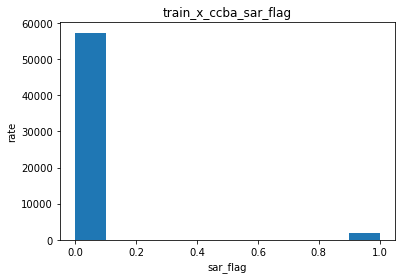

總數  59075
sar=0  57299
sar=1  1776


In [67]:
sar_ccba = train_x_ccba["sar_flag"]
plt.title("train_x_ccba_sar_flag")
plt.xlabel("sar_flag")
plt.ylabel("rate")
plt.hist(sar_ccba)
plt.show()
print("總數 ",len(sar_ccba)) 
print("sar=0 ",sar_ccba.value_counts()[0])
print("sar=1 ",sar_ccba.value_counts()[1])

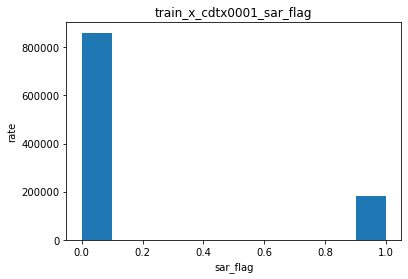

總數  1043014
sar=0  860010
sar=1  183004


In [72]:
sar_cdtx = train_x_cdtx0001["sar_flag"]
plt.title("train_x_cdtx0001_sar_flag")
plt.xlabel("sar_flag")
plt.ylabel("rate")
plt.hist(sar_cdtx)
plt.show()
print("總數 ",len(sar_cdtx)) 
print("sar=0 ",sar_cdtx.value_counts()[0])
print("sar=1 ",sar_cdtx.value_counts()[1])

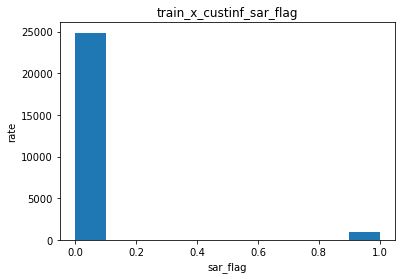

總數  25751
sar=0  24861
sar=1  890


In [73]:
sar_custinf = train_x_custinf["sar_flag"]
plt.title("train_x_custinf_sar_flag")
plt.xlabel("sar_flag")
plt.ylabel("rate")
plt.hist(sar_custinf)
plt.show()
print("總數 ",len(sar_custinf)) 
print("sar=0 ",sar_custinf.value_counts()[0])
print("sar=1 ",sar_custinf.value_counts()[1])

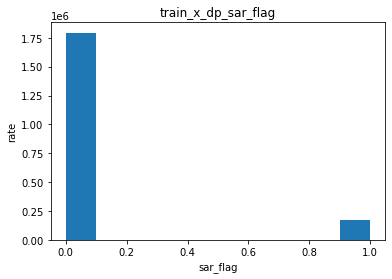

總數  1969818
sar=0  1793808
sar=1  176010


In [74]:
sar_dp = train_x_dp["sar_flag"]
plt.title("train_x_dp_sar_flag")
plt.xlabel("sar_flag")
plt.ylabel("rate")
plt.hist(sar_dp)
plt.show()
print("總數 ",len(sar_dp)) 
print("sar=0 ",sar_dp.value_counts()[0])
print("sar=1 ",sar_dp.value_counts()[1])

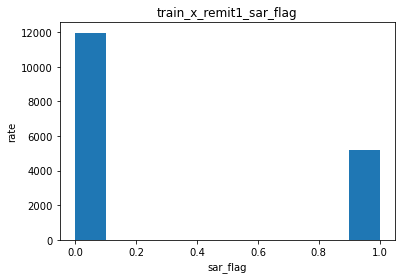

總數  17167
sar=0  11963
sar=1  5204


In [75]:
sar_remit1 = train_x_remit1["sar_flag"]
plt.title("train_x_remit1_sar_flag")
plt.xlabel("sar_flag")
plt.ylabel("rate")
plt.hist(sar_remit1)
plt.show()
print("總數 ",len(sar_remit1)) 
print("sar=0 ",sar_remit1.value_counts()[0])
print("sar=1 ",sar_remit1.value_counts()[1])

**只取滿足 sar = 1的部分 分析特征**

In [79]:
sar_ccba_1 = train_x_ccba.loc[train_x_ccba['sar_flag']==1]
print(sar_ccba_1)
sar_cdtx_1 = train_x_cdtx0001.loc[train_x_cdtx0001['sar_flag']==1]
print(sar_cdtx_1)
sar_custinf_1 = train_x_custinf.loc[train_x_custinf['sar_flag']==1]
print(sar_custinf_1)
sar_dp_1 = train_x_dp.loc[train_x_dp['sar_flag']==1]
print(sar_dp_1)
sar_remit1_1 = train_x_remit1.loc[train_x_remit1['sar_flag']==1]
print(sar_remit1_1)

                                                 cust_id  lupay   byymm   \
504    12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...       0     61    
505    12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...       0     91    
506    12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...    390     122    
507    12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...       0    153    
508    12c9e6d35500d2a96fc2b22a9da8e3deb6048de515a16e...       0    183    
...                                                  ...     ...     ...   
58656  fe08fb557052ab9865c301f4bd3c5930254199c2db3516...       0    244    
58657  fe08fb557052ab9865c301f4bd3c5930254199c2db3516...       0    275    
58658  fe08fb557052ab9865c301f4bd3c5930254199c2db3516...       0    306    
58659  fe08fb557052ab9865c301f4bd3c5930254199c2db3516...       0    334    
58660  fe08fb557052ab9865c301f4bd3c5930254199c2db3516...       0    365    

          cycam   usgam   clamt   csamt   inamt   cucsm   cucah   rank  \
504     120,1

**sar=1與cdtx的分佈**

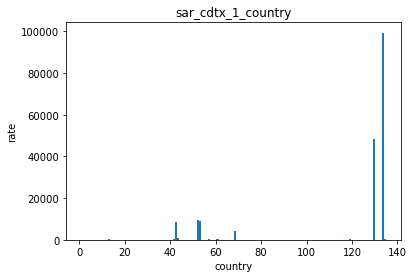

總數  183004
消費地國別為台灣  48507


134    99331
130    48507
52      9479
53      9169
43      8459
68      4021
44       919
135      616
42       577
61       425
13       283
57       219
119      207
94       140
41       136
31        69
37        48
93        47
27        46
1         44
36        36
118       32
19        22
10        19
76        18
7         16
67        16
18        15
30        13
87        12
75        11
129        8
64         8
110        5
47         5
29         3
16         3
15         3
78         3
25         2
90         2
32         2
125        2
65         2
73         1
105        1
17         1
77         1
Name: country, dtype: int64

In [134]:
#country消費地國別與sar=1的分佈
sar_cdtx_1_country = sar_cdtx_1["country"]
plt.title("sar_cdtx_1_country")
plt.xlabel("country")
plt.ylabel("rate")
plt.hist(sar_cdtx_1_country,bins=140)
plt.show()
print("總數 ",len(sar_cdtx_1_country)) 
print("消費地國別為台灣 ",sar_cdtx_1_country.value_counts()[130])
sar_cdtx_1_country.value_counts()

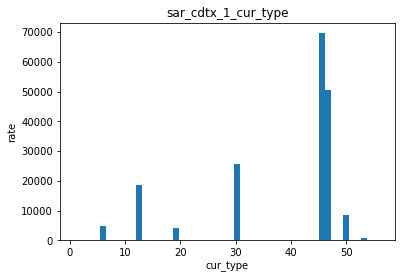

總數  183004
消費地幣別為台幣 69257
消費地幣別為台幣 50475


46    69257
47    50475
30    25650
13    18603
50     8448
6      4803
19     4053
53      910
45      381
56      283
43       43
7        22
16       22
2        20
41       14
1        12
5         3
37        3
40        2
Name: cur_type, dtype: int64

In [135]:
#cur_type消費地幣別與sar=1的分佈
sar_cdtx_1_cur_type = sar_cdtx_1["cur_type"]
plt.title("sar_cdtx_1_cur_type")
plt.xlabel("cur_type")
plt.ylabel("rate")
plt.hist(sar_cdtx_1_cur_type,bins=50)
plt.show()
print("總數 ",len(sar_cdtx_1_cur_type)) 
print("消費地幣別為台幣",sar_cdtx_1_cur_type.value_counts()[46])
print("消費地幣別為台幣",sar_cdtx_1_cur_type.value_counts()[47])
sar_cdtx_1_cur_type.value_counts()

**sar=1與custinfo的分佈**

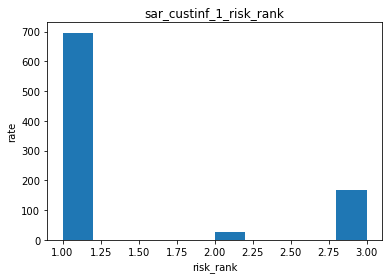

總數  890
風險等級 = 1 696
風險等級 = 2 27
風險等級 = 3 167


In [100]:
#risk_rank風險等級與sar=1的分佈
sar_custinf_1_risk_rank = sar_custinf_1["risk_rank"]
plt.title("sar_custinf_1_risk_rank")
plt.xlabel("risk_rank")
plt.ylabel("rate")
plt.hist(sar_custinf_1_risk_rank)
plt.show()
print("總數 ",len(sar_custinf_1_risk_rank)) 
print("風險等級 = 1",sar_custinf_1_risk_rank.value_counts()[1])
print("風險等級 = 2",sar_custinf_1_risk_rank.value_counts()[2])
print("風險等級 = 3",sar_custinf_1_risk_rank.value_counts()[3])

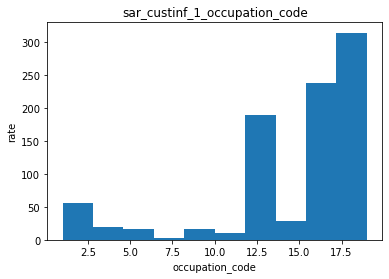

總數  890
職業 = 19 212
職業 = 18 102
職業 = 17 235
職業 = 12 145


17.0    235
19.0    212
12.0    145
18.0    102
1.0      55
13.0     44
9.0      17
5.0      16
15.0     16
3.0      15
14.0     12
11.0      9
4.0       4
16.0      3
8.0       3
2.0       1
10.0      1
Name: occupation_code, dtype: int64

In [136]:
#occupation_code職業與sar=1的分佈
sar_custinf_1_occupation_code = sar_custinf_1["occupation_code"]
plt.title("sar_custinf_1_occupation_code")
plt.xlabel("occupation_code")
plt.ylabel("rate")
plt.hist(sar_custinf_1_occupation_code)
plt.show()
print("總數 ",len(sar_custinf_1_occupation_code)) 
print("職業 = 19",sar_custinf_1_occupation_code.value_counts()[19])
print("職業 = 18",sar_custinf_1_occupation_code.value_counts()[18])
print("職業 = 17",sar_custinf_1_occupation_code.value_counts()[17])
print("職業 = 12",sar_custinf_1_occupation_code.value_counts()[12])
sar_custinf_1_occupation_code.value_counts()

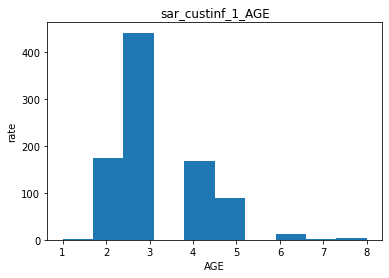

總數  890
年齡 = 2 175
年齡 = 3 441
年齡 = 4 168


3    441
2    175
4    168
5     88
6     13
8      3
7      1
1      1
Name: AGE, dtype: int64

In [137]:
#AGE年齡與sar=1的分佈
sar_custinf_1_AGE = sar_custinf_1["AGE"]
plt.title("sar_custinf_1_AGE")
plt.xlabel("AGE")
plt.ylabel("rate")
plt.hist(sar_custinf_1_AGE)
plt.show()
print("總數 ",len(sar_custinf_1_AGE)) 
print("年齡 = 2",sar_custinf_1_AGE.value_counts()[2])
print("年齡 = 3",sar_custinf_1_AGE.value_counts()[3])
print("年齡 = 4",sar_custinf_1_AGE.value_counts()[4])
sar_custinf_1_AGE.value_counts()

**sar=1與dp的分佈**

In [138]:
#info_asset_code，資訊資產代號；tx_type 交易類別 與sar=1的分佈
sar_dp_1_info_asset_code = sar_dp_1["info_asset_code"]
sar_dp_1_info_asset_code_type= train_x_dp.loc[(train_x_dp['sar_flag']==1)&(train_x_dp['tx_type']==1)&(train_x_dp['info_asset_code']==12)]
print(sar_dp_1_type)
print("總數 ",len(sar_dp_1_info_asset_code)) 
print("臨櫃現金交易 ",len(sar_dp_1_info_asset_code_type)) 

                                                   cust_id debit_credit  \
234298   010f0a437884833140ede0ec8ac7b6f54fb4341a8aea81...           DB   
260788   06904a74a3b04d5f0c6cc7e0fab6cd10661e8ec9ccb302...           CR   
260871   06904a74a3b04d5f0c6cc7e0fab6cd10661e8ec9ccb302...           CR   
260911   06904a74a3b04d5f0c6cc7e0fab6cd10661e8ec9ccb302...           CR   
261038   06904a74a3b04d5f0c6cc7e0fab6cd10661e8ec9ccb302...           CR   
...                                                    ...          ...   
1512420  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           CR   
1512452  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           CR   
1512482  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           CR   
1512495  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           CR   
1512503  ff1edb79332e0114ad8db6cec9bb912e59c03c1088e178...           CR   

         tx_date  tx_time  tx_type   tx_amt  exchg_rate  info_asset_code  \
234298       316       

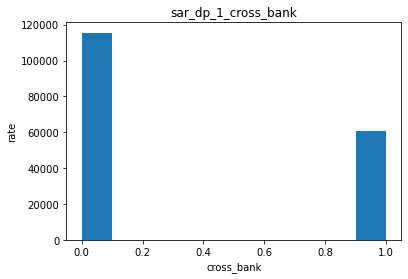

總數  176010
非跨行 115459
跨行 60551


In [117]:
#cross_bank跨行交易與sar=1的分佈
sar_dp_1_cross_bank = sar_dp_1["cross_bank"]
plt.title("sar_dp_1_cross_bank")
plt.xlabel("cross_bank")
plt.ylabel("rate")
plt.hist(sar_dp_1_cross_bank)
plt.show()
print("總數 ",len(sar_dp_1_cross_bank)) 
print("非跨行",sar_dp_1_cross_bank.value_counts()[0])
print("跨行",sar_dp_1_cross_bank.value_counts()[1])

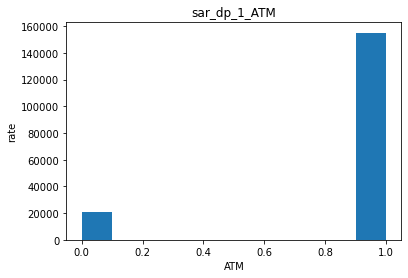

總數  176010
非實體ATM交易 20854
實體ATM交易 155156


In [118]:
#ATM交易與sar=1的分佈
sar_dp_1_ATM = sar_dp_1["ATM"]
plt.title("sar_dp_1_ATM")
plt.xlabel("ATM")
plt.ylabel("rate")
plt.hist(sar_dp_1_ATM)
plt.show()
print("總數 ",len(sar_dp_1_ATM)) 
print("非實體ATM交易",sar_dp_1_ATM.value_counts()[0])
print("實體ATM交易",sar_dp_1_ATM.value_counts()[1])